# **La Classification avec un réseau de neurones**

## **Qu'est-ce qu'un probleme de clasification ?**

Vous avez certainement été en contact avec un probleme de ***classification*** un jour ou l'autre, ue ce soit dans votre vie professionelle ou personelle.

En effet, vous avez certainement été contraint un jour ou l'autre à vérifier si le dernier mail reçu était un **Spam** ou **Non**.

Que l'on vous accorde le prêt d'un **crédit** ou qu'on vous le **refuse**.

De vous demander quels **Tag** aura l'article suivant, sivant une liste de **Tag** défini.

Ou de tester une application qui reconnait le ou les objets présents sur une **photo** prise avec votre nouveau smartphone. Vous permettant ainsi une recherche facile des images.

Tout ces exemples sont des problèmes de ***Classification*** de la vie courante!





> ### **Type de Classification**

Vous avez donc des classifications :
1. **Binaire** - Pouvant classer l'objet de la recherche dans une classe ou l'autre.
  - Un échantillon aura un seul label parmis deux labels différent.
2. **MultiClasse** - Pouvant classer l'objet de la recherche dans une de nombreuses classes (>2 classes)
  - Un échantillon aura un seul label parmis plusieurs labels possibles.
3. **Multilabel** - Pouvant classer l'objet de la recherche dans plusieurs classes en même temps, parmis un plusieurs labels possibles.

## **Ce que nous allons voir dans ce cours**

1. L'architecture d'un réseau de neurone de classification.
2. Les entrées et sorties d'un réseau de neurones de classifications.
3. Voir les données et les entrainer.
4. Les différentes étapes de la création d'un réseau de neurones
  - Créer le modèle
  - compiler le modèle
  - Entrainer le modèle
  - Evaluer le modèle
5. Evaluer différents types de classifications
6. Sauver et charger son modèle.

## **La classifications : Les entrées et sorties**

Quelle que soient les données à classifier, il faudra les rendre numériques si ce n'est pas le cas.
Mais par la suite, 

## **Les fonctions d'activations**

Nous avons vu l'activation `Relu` est la fonction d'activation du/des neurone(s) de sortie qui est utilisée en régression.

En classification il y a d'autres fonctions, qui ne seront pas expliquées ici, qui interviennent :
1. **Classification Binaire** : la fonction Sigmoïd.
 > -  Fonction Loss : `BinaryCrossEnthrop`
 > -  Optimizer : `Adam` ou `SGD`
2. **Classification Multiclass** : la fonction Softmax 
 > -  Fonction Loss : `CategoricalCrossEnthrop`
 > -  Optimizer : `Adam` ou `SGD`



# **Allons voir ce qui se passe dans le code**







> ## **Classification Binaire**

>> ### **Créons les data**

Pour cet exemple, prenons quelque chose de très visuel.

Nous allons créer deux cercles proches l'un de l'autre.
Le but sera de déterminer la frontière de classification entre les deux cercles!

In [2]:
from sklearn.datasets import make_circles
import tensorflow as tf

In [3]:
#Prenons 1000 exemples pour avoir une dataset large et une frontière la plus visible
samples = 1000
X, y = make_circles(n_samples = samples, noise = 0.03, random_state = 42)

**Souvenez-vous**, dans un problème, il faut 
- visualiser, 
- visualiser, 
- visualiser!

In [ ]:
#X,y

In [4]:

import pandas as pd

circles = pd.DataFrame(
    {"X0":X[:,0],
     "X1":X[:,1],
     "y":y})

circles.head()

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


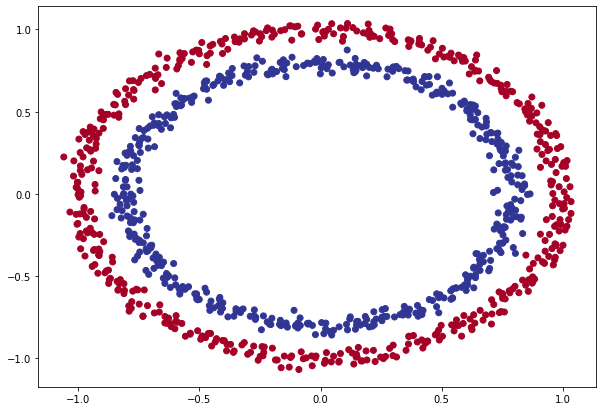

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu) 
# Nous dessinons X[0] en fonction de X[1], où la couleur est y (soit 1 ou 0)


In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

>> ### **Quelles sont les étapes de modélisation avec un RNN**

- 1. Créer le modèle
- 2. Compiler le modèle
- 3. Entrainer le modèle
- 4. Evaluer le modèle

>> ### **Créons un premier modèle**

In [8]:
# Etape 1 : Création du modèle
model_1 = tf.keras.Sequential(name = 'model_1')
model_1.add(tf.keras.layers.Dense(1, input_shape=[2]))

#Etape 2 : Compiler le modèle
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])


#3. Entrainement du modèle
model_1.fit(X,y, epochs = 5, verbose = 1)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.9484 - accuracy: 0.4700
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 1.3739 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7118 - accuracy: 0.5070
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4950


**REMARQUE**
L'`accuracy` de **0.48** correspond à 48% de performance du modèle.

C'est à dire que le modèle arrive à classifier correctement 48% des points lors de l'entrainement.

Honnetement, c'est pas extra!

In [9]:
#Entrainons le modèle plus longtemps afin de l'améliorer
# Etape 1 : Création du modèle
model_2 = tf.keras.Sequential(name='model_2')
model_2.add(tf.keras.layers.Dense(1, input_shape=[2]))

#Etape 2 : Compiler le modèle
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])


#3. Entrainement du modèle
model_2.fit(X,y, epochs = 200, verbose = 0)

In [10]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

**REMARQUE**
Nous voyons que l'`accuracy` du modèle est de **50%**, ce qui n'est pas une grande évolution par rapport au **model_1**.

Afin de faire évoluer le modèle, essayons d'ajouter une autre couche de neurones et la fonction d'optimisation.

In [14]:
#Entrainons le modèle plus longtemps afin de l'améliorer
# Etape 1 : Création du modèle
model_3 = tf.keras.Sequential(name='model_3')
model_3.add(tf.keras.layers.Dense(100, input_shape=[2], name = 'Input_Layer'))
model_3.add(tf.keras.layers.Dense(10, name = 'Hidden_Layer_1'))
model_3.add(tf.keras.layers.Dense(1, name = 'Output_Layer'))

#Etape 2 : Compiler le modèle
model_3.compile(loss="BinaryCrossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


#3. Entrainement du modèle
model_3.fit(X,y, epochs = 100, verbose = 0)

In [15]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 100)               300       
                                                                 
 Hidden_Layer_1 (Dense)      (None, 10)                1010      
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5040


[0.6935914158821106, 0.5040000081062317]

**REMARQUE**
Nous remarquons que dans l'éavluation de notre modèle, l'accuray est bien meilleure.

Le fait d'avoir rajouté des neurones et passer l'optimizer en Adam est assez interessant et améliore le modèle.

En lançant une prédiction sur X nous remarquons que la réponse n'est pas 1 ou 0 mais bien 0.56, 0.4897...

En effet, nous avons une probabilité de décision :
- 0.56 est la probabilité à **56%** que le point soit de catégrie 1
- 0.4897 est la probabilité à **48,9 %** que le point 
 - soit de catégorie 1 (soit de **51,1 %** que le point soit de catégorie 0)

In [ ]:
#model_3.predict(X)

Pour pouvoir dessiner la frontière de décision, nous allons 
1. Créer un tableau qui nous servira de zone de travail. Pour cela, nous allons :
  -  Trouver X_min, X_max (pour la partie X de la zone) à partir de X[0]
  -  Trouver Y_min, Y_max (pour la partie Y de la zone) à partir de X[1]
  -  Utiliser Meshgrid pour créer la grille de coordonnées au départ de X_min, X_max, Y_min et Y_max
2. Venir "flatter", rendre les coordonnées de la grille sur une seule ligne
  - Nous obtenons X_in (l'ensemble des coordonnées de la grille)
3. Prédire la catégorie de l'ensemble des points sur la grille de travail
4. Etablir la valeur de y pred en fonctio,n du type de classification étudié.
5. Dessiner 
  - Les zones de décisions
  - Les points X et y de la dataset
  - La limite de décision Xlim et Ylim


>> ### **Visualisons la première classification**

In [17]:
import numpy as np
def plot_decision_bound(model, X, y):

  # Afin que les points ne soient pas les uns sur les autres nous allons ajouter une tolérance de 0.1.
  X_min, X_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))

  X_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(X_in)

  if len(y_pred[0]) > 1 :
    print((y_pred[0]))
    print("Nous faisons de la classification Multiclass")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else :
    print("Nous faisons de la classification binaire")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.figure(figsize=(10,7))
  plt.contourf(xx,yy,y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s = 40, cmap = plt.cm.RdYlBu)

  plt.xlim(xx.min(), xx.max())
  plt.ylim=(yy.min(), yy.max())


Nous faisons de la classification binaire


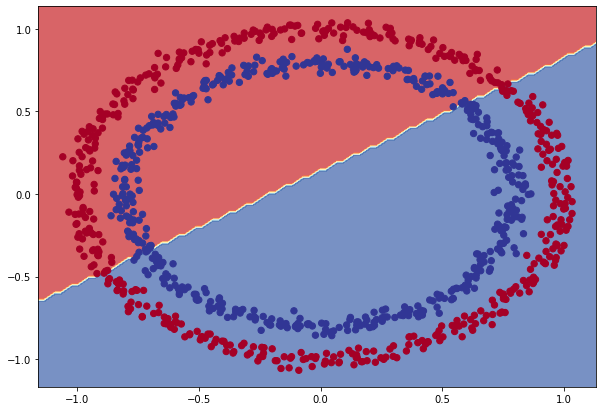

In [18]:
plot_decision_bound(model = model_3, X = X, y = y)



**OLALA** Cela ne va pas du tout!

Il y a un sérieux probleme de décision!

La frontière de décision qui se voulait être circulaire, ne l'est pas du tout!

**Mais notre modèle pourrait-il être utilisé dans une régression?**

>> ### **Utilisons le modèle dans un probleme de régression**

In [27]:
#Créons des datas dédiées à la régression
X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)

X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [21]:
#testons le modèle 3
model_3.fit(x_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: ignored

**Attendez un peu...**

Que se passe-t-il?

On comparare un probleme dont de classification binaire avec un probleme de regression linéaire simple!

De plus, il y a deux entrées dans notre modèle de classification et une seule dans le probleme de regression.

> **Cela ne peut pas du tout aller pour un probleme de regression linéaire simple!**

Si nous voulons essayer 



In [41]:
#1. Création du modèle
model_4 = tf.keras.Sequential(name='model_4')
model_4.add(tf.keras.layers.Dense(100, input_shape = [1],name='Input_Layer'))
model_4.add(tf.keras.layers.Dense(10, name='Hiden_Layer_1'))
model_4.add(tf.keras.layers.Dense(1, name='Output_Layer'))

#Compile du modèle

model_4.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_4.fit(X_reg_train, y_reg_train, epochs = 100, verbose = 0)

In [42]:
model_4.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 13ms/step - loss: 55.6296 - mae: 55.6296


[55.629600524902344, 55.629600524902344]

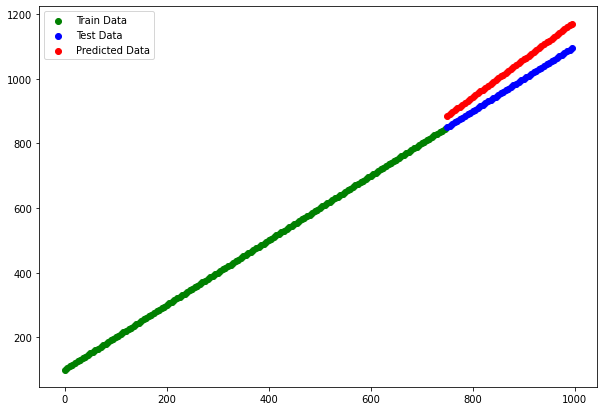

In [43]:
y_reg_pred = model_4.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c = 'g', label='Train Data')
plt.scatter(X_reg_test, y_reg_test, c = 'b', label='Test Data')
plt.scatter(X_reg_test, y_reg_pred, c = 'r', label='Predicted Data')
plt.legend(loc='best')


**MAIS ALORS**, pourquoi en modifiant le modèle nous arrivons à faire une *regression linaire*, mais que sans modifier nous ne pouvons pas appliquer le model_3 directement sur les données linéaire ?

**ET BIEN LA REPONSE EST SIMPLE**

Le probleme de classification que nous essayons de résoudre n'est pas linéaire!!!

Nous voila confronté à un probleme de **NON LINEARITE**

Découvrons ce que cela signifie!
